In [1]:
import mysql.connector
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pandas as pd
from sklearn.preprocessing import minmax_scale

import seaborn as sns

from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from datetime import datetime

# Matplotlib visualization
import matplotlib.pyplot as plt

import warnings
import os
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
store = pd.HDFStore('TravDB.h5')
store.close()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Detta behöver inte köras varje gång.

# os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
# store = pd.HDFStore('TravDB.h5')

# mydb = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     passwd="xxxxx12345",
#     database="TravDB")

# store['odds'] = pd.read_sql('SELECT * FROM odds', con=mydb)
# store['tvl'] = pd.read_sql('SELECT * FROM tvl', con=mydb)
# store['lopp'] = pd.read_sql('SELECT * FROM lopp', con=mydb)
# store['prog'] = pd.read_sql('SELECT * FROM prog', con=mydb)
# store['horse'] = pd.read_sql('SELECT * FROM horse', con=mydb)
# store['agare'] = pd.read_sql('SELECT * FROM agare', con=mydb)
# store['mtid'] = pd.read_sql('SELECT * FROM mtid', con=mydb)
# store['age'] = pd.read_sql('SELECT * FROM age', con=mydb)
# store['ban'] = pd.read_sql('SELECT * FROM ban', con=mydb)
# store['variab'] = pd.read_sql('SELECT * FROM variab', con=mydb)
# store.close()


In [3]:
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys/')
store = pd.HDFStore('TravDB.h5', format='table')

tvl = store['tvl']
prog = store['prog'] 

df = pd.concat([tvl.dropna(subset=['v5']),
                tvl.dropna(subset=['v75']),
                tvl.dropna(subset=['v86'])], ignore_index=True)

df['V5'] = df['v5'].apply(lambda x: 1 if x >= 0 else 0)
df['V75'] = df['v75'].apply(lambda x: 1 if x >= 0 else 0)
df['V86'] = df['v86'].apply(lambda x: 1 if x >= 0 else 0)

def spel(row):
    if row['V5'] == 1:
        return 'V5'
    if row['V75'] == 1:
        return 'V75'
    if row['V86'] == 1:
        return 'V86'
    return 'Other'

df['Spel'] = df.apply(spel, axis = 1)

df = df.drop(columns=['v5','v75','v86','bana'])
dftvl = df.rename(columns={'id': 'tvlid'})

dftvl.head()

,tvlid,datum,lopp,startsatt,distans,division,banforh,v65,forstapris,loppid,starttid,konhv,antilopp,V5,V75,V86,Spel
0,77612,2008-08-18,8,V,S,V,None,None,50000.0,657893.0,None,5,5,1,0,0,V5
1,77611,2008-08-18,7,A,K,V,None,None,40000.0,657886.0,None,11,12,1,0,0,V5
2,77610,2008-08-18,6,A,K,K,None,None,40000.0,657868.0,None,10,10,1,0,0,V5
3,77609,2008-08-18,5,V,M,V,None,None,40000.0,657895.0,None,9,10,1,0,0,V5
4,77608,2008-08-18,4,A,M,V,None,None,40000.0,657879.0,None,10,11,1,0,0,V5


In [4]:
# prog.head()
# dftvl.head()
# ban = store['ban'] 
# ban.head(200)

In [5]:
# Variabelname finns i variab
v = store['variab'][1:]
v['id'] = 'v'+v['id'].astype(str)
dfprog = prog.rename(columns=dict(v[['id','namn']].values))
dfprog.head()

,id,tvlid,horseid,spar,kusk,pvalue,tid,verklspar,plac,rank,atgkod,odds1,AgareP,AgareSegrar,ArvP,ArvSegrar,BanP,BanSegrar,Galopp,InbForluster,InbSegrar,Intakt,IntaktII,IntaktperStart,KonAlder,KonAlderSegrar,KuskBanP,KuskBanSegrar,KuskP,KuskSegrar,KuskV75P,KuskV75Segrar,Maskintid,Medelplac,MorfarP,MorfarSegrar,Odds,OddsAnalys,PlatsP,Platsodds,RakaSegrar,Rekord,Resvag,Runda,SegerP,SenasteStart,SparP,SparSegrar,SparBanP,SparBanSegrar,Streck,StreckP,TidBesta,TidSenast,Tillagg,TranareP,TranareSegrar,Uppehall,V75Proc,V75Segrar,V75Starter,BanfhMedel,BanfhPlatsP,BanfhSegerP,DistansMedel,DistansPlatsP,DistansSegerP,Stabilitet,stabilitet,stabb,bort,pvalue2,stid,diff,tidsrank,tidsplac,tidsrank2,PrisFgStart,PrisMedel,Egen1,Egen2,ranktid,BanfhSegrar,DistansSegrar,bana,avdv75,DistansTid,AutoKort,Tswodds,Poäng,agarnr,tranarnr,AtgPoäng,uppehall,MtidRank,RakaVinstP,GaloppVinstP,UppehallVinstP,KuskRank,FramBakspar,antstreck,MtidMedel,MtidForm,Streckant,StreckantP,SpårklassP,SpårklassSegrar,SpårTidSenast,SpårTidBästa,SpårTidSegKvot,SpårTidSeger%,SpårTidRank,Vinstchans,SHRank,SHRankTid,Ranktal,RanktalTid,POdds,IntaktRank,SnittOdds,PoengSnitt,Hardhet,Hardhet2,PoengRank,PoengBetyg,v98,v99
0,190657,17450,23900,1,3824,1.71,228,1.0,4,2.0,Tho He,NaN,0.0,0.0,0.0,0.0,8.0,13042.0,0.0,1.0,0.0,43000.0,43000.0,7167.0,9.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,34.0,0.0,NaN,80.0,1.0,50.0,19.0,0.0,1.0,100.0,0.0,0.0,4.0,12.0,6615.0,13.0,388.0,NaN,12.0,176.0,197.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,35.0,50.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,4.0,228.0,11.0,3.52,3.905660,0.0,0.0,0.0,17.0,NaN,3.0,0.0,0.0,J,0.0,-187.0,182.0,48.0,0.0,7052.0,839.0,0.0,3.0,3.0,809.0,966.0,881.0,91.0,99.0,NaN,202.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,21.0,18.0,22.0,17.0,NaN,11.0,2.0,NaN,NaN,NaN,None,None,None,None,None
1,190658,17450,9081,2,1346,1.00,217,2.0,1,1.0,Luo Ul,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,2.0,35000.0,35000.0,17500.0,9.0,276.0,20.0,1.0,20.0,1.0,0.0,0.0,186.0,15.0,0.0,0.0,472.0,1.0,100.0,16.0,0.0,0.0,100.0,0.0,50.0,2.0,8.0,126.0,11.0,10.0,NaN,0.0,188.0,188.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,20.0,100.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,None,1.0,217.0,0.0,1.00,1.000000,0.0,0.0,0.0,34.0,NaN,1.0,0.0,0.0,J,0.0,-194.0,-177.0,22.0,0.0,2904.0,1265.0,0.0,3.0,2.0,809.0,966.0,881.0,91.0,99.0,NaN,192.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,45.0,35.0,56.0,10.0,NaN,29.0,1.0,NaN,NaN,NaN,None,None,None,None,None
2,190659,17450,23336,3,211,2.12,228,3.0,5,3.0,Bok In,NaN,0.0,0.0,0.0,0.0,8.0,83.0,1.0,1.0,0.0,20000.0,20000.0,6667.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,33.0,0.0,0.0,380.0,2.0,33.0,27.0,0.0,0.0,13.0,0.0,0.0,4.0,9.0,144.0,8.0,7.0,NaN,0.0,164.0,164.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,33.0,0.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None,6.0,228.0,11.0,3.50,3.905660,0.0,0.0,0.0,11.0,NaN,2.0,0.0,0.0,J,0.0,204.0,-164.0,81.0,0.0,108.0,645.0,0.0,3.0,1.0,809.0,922.0,881.0,62.0,99.0,NaN,177.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.0,13.0,9.0,21.0,NaN,9.0,3.0,NaN,NaN,NaN,None,None,None,None,None
3,190660,17450,15541,4,1163,2.23,219,4.0,2,4.0,Ben In,NaN,0.0,0.0,0.0,0.0,9.0,35.0,1.0,0.0,0.0,25327.0,25327.0,4221.0,9.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,50.0,0.0,0.0,16.0,3.0,16.0,30.0,0.0,0.0,49.0,0.0,0.0,4.0,8.0,112.0,6.0,5.0,NaN,53.0,198.0,198.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,16.0,0.0,50.0,25.0,0.0,NaN,NaN,NaN,None,7.0,219.0,2.0,6.19,1.528302,0.0,0.0,0.0,13.0,NaN,4.0,0.0,0.0,J,0.0,219.0,-192.0,107.0,0.0,4792.0,1514.0,0.0,1.0,4.0,809.0,911.0,950.0,72.0,99.0,NaN,205.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,13.0,7.0,22.0,NaN,7.0,4.0,NaN,NaN,NaN,None,None,None,None,None
4,190661,17450,23556,5,484,2.71,265,5.0,O,7.0,Sju Jö,NaN,0.0,0.0,0.0,0.0,8.0,13041.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,90.0,0.0,0.0,123.0,3.0,0.0,44.0,0.0,0.0,100.0,0.0,0.0,7.0,8.0,75.0,8.0,6.0,NaN,5.0,253.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,90.0,0.0,0.0,NaN,NaN,NaN,None,9.0,265.0,48.0,13.85,13.679245,0.0,0.0,0.0,7.0,NaN,5.0,0.0,0.0,J,0.0,-500.0,-500.0,407.0,0.0,4792.0,7313.0,0.0,0.0,5.0,809.0,966.

In [6]:
df = pd.merge(dftvl, dfprog, on='tvlid', how='inner')
df_selected = df[['tvlid','datum','lopp','startsatt','division','spar','plac','Odds','Platsodds','horseid','id','bana','Spel']]
df.drop(columns=['forstapris','loppid','starttid','konhv','antilopp','id','horseid','atgkod','odds1','Platsodds',
                 'tid','stid','diff', 'tidsplac','POdds','OddsAnalys','v98','v99','V5','V75','V86', 'v65'], inplace = True)

In [7]:
# df.Odds.head()

In [8]:
# pd.crosstab(df['startsatt'], columns='count')
# pd.crosstab(df['distans'], columns='count')
# pd.crosstab(df['division'], columns='count')
# pd.crosstab(df['banforh'], columns='count')
# pd.crosstab(df['Spel'], columns='count')

In [9]:
# Beräknar andel missing-värden per koloumn
def missing_values_table(df):
        mis_val = df.isnull().sum()       
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns
    
missvar = missing_values_table(df)
# missvar

Your selected dataframe has 121 columns.
There are 112 columns that have missing values.


In [10]:
# missvar

In [11]:
# Tar bort variabler med mer än 5% missing.
var= missvar[missvar['% of Total Values']>5]
var['var'] = var.index

df2 = df.drop(columns=list(var['var']))
# Skapar vinnarflagga 
df2['VinnareFlg'] = df2['plac'].apply(lambda x: 1 if x == '1' else 0)

# Skapar platsflagga 
df2['PlatsFlg'] = df2['plac'].apply(lambda x: 1 if x in ['1','2','3'] else 0)

# df2.head()
# df2.info()


In [12]:
# df2.info()

In [13]:
# Ersätter missingvärden.

start_time = datetime.now()

df2['datum'] = pd.to_datetime(df2['datum'], errors = 'coerce')
df_all = df2.loc[(df2['datum'] > '2016-01-01')]

# df_all = df_all.head(20000)
df_all['index'] = df_all.index

num_df = df_all.select_dtypes('number')
num_cols = num_df.columns
miss_cols = num_df.columns[num_df.isnull().any()].tolist()
miss_cols.remove('Odds') # Missing i odds ska inte ersättas

# Lägger på min och max för alla kolumner inom ramen för tvlid. Används när normaliserade variabler beräkns. 
gmean = df_all[miss_cols+['tvlid']].groupby('tvlid').mean().add_prefix('mean_')
gmin = df_all.groupby('tvlid').min().add_prefix('min_')
gmax = df_all.groupby('tvlid').max().add_prefix('max_')

df_all.set_index('tvlid', inplace = True)
df_all= df_all.join(gmean,how='inner')

# Om en häst i ett lopp har missing ersätt detta värde med medelvärdet över alla häster i loppet
for name in miss_cols:
    df_all[name] = np.where(df_all[name].isnull, df_all['mean_'+name], df_all[name])
    
# Om any missing tas raden bort (efter steget ovan finns bara fall där alla hästar har missing, dvs hela loppet tas bort)     
df_all.dropna(how='any', inplace = True)

# Tar bort mean_-columner
df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='mean_')))]

df_all = df_all.join(gmin,how='inner')
df_all = df_all.join(gmax,how='inner')

df_all['tvlid'] = df_all.index
df_all = df_all.set_index('index')
df_all.index.name = None
df_all=df_all.sort_index()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:04:03.153991


In [14]:
# df_all.isnull().sum()
# df_all.count()

In [15]:
# Normaliserar alla kolummer. Placering är relativt inom ramen för varje lopp vilket även features ska vara.
# Tar bort variabler som ej är features.

num_col_fetures = list(num_cols)

ind2remove = ['index','tvlid','lopp','spar','kusk','verklspar','VinnareFlg','PlatsFlg','agarnr','tranarnr']

for i in ind2remove:
    num_col_fetures.remove(i)
    
for name in num_col_fetures:
#     Om min och max är samma sätts 0.5 som normaliserat värde 
    df_all['N_'+name] = np.where((df_all['max_'+name] != df_all['min_'+name]),
                                 (df_all['max_'+name] - df_all[name]) / (df_all['max_'+name] - df_all['min_'+name]), 0.5)
      
selection = ['Odds','VinnareFlg','PlatsFlg','datum','tvlid',]+list(df_all.columns[pd.Series(df_all.columns).str.startswith('N_')])
df_select = df_all[selection]


In [16]:
# df_select.count()

In [17]:
# Skapar train, validation och test df (test är out-of-time övriga är out-of-sample).
# Urvalet görs på tvlid-nivå och inte på radnivå.

test_period =(df_select['datum'] >= '2018-01-01') & (df_all['datum'] <= '2019-01-01')
df_test = df_select.loc[test_period]

train_valid_period =(df_select['datum'] >= '2016-01-01') & (df_all['datum'] < '2018-01-01')
df_train_valid = df_select.loc[train_valid_period]

train_tvlid = list(df_train_valid['tvlid'].drop_duplicates(inplace=False).sample(frac=0.8))

df_train = df_train_valid [df_train_valid ['tvlid'].isin(train_tvlid)]
df_valid = df_train_valid [~df_train_valid ['tvlid'].isin(train_tvlid)]

# print('Train:', df_train.shape, 'Valid:', df_valid.shape, 'Test:', df_test.shape)

df_train[df_train.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]
df_valid[df_valid.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]
df_test[df_test.replace([np.inf, -np.inf], np.nan).notnull().any(axis=1)]

# Skapar features
X = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('N_')]].astype(np.float64)
X_valid = df_valid[df_valid.columns[pd.Series(df_valid.columns).str.startswith('N_')]].astype(np.float64)
X_test = df_test[df_test.columns[pd.Series(df_test.columns).str.startswith('N_')]].astype(np.float64)

# Om det finns missing ersätts dessa med mean från train df.
X.fillna(X.mean(),inplace = True)
X_valid.fillna(X.mean(),inplace = True)
X_test.fillna(X.mean(),inplace = True)

# Skapar target
y = df_train['VinnareFlg'].astype(np.int32)
y_valid = df_valid['VinnareFlg'].astype(np.int32)
y_test = df_test['VinnareFlg'].astype(np.int32)

print('Train:', df_train.shape, 'Valid:', df_valid.shape, 'Test:', df_test.shape)
print('Train:', X.shape, 'Valid:', X_valid.shape, 'Test:', X_test.shape)
print('Train:', y.shape, 'Valid:', y_valid.shape, 'Test:', y_test.shape)


Train: (119962, 75) Valid: (29855, 75) Test: (72665, 75)
Train: (119962, 70) Valid: (29855, 70) Test: (72665, 70)
Train: (119962,) Valid: (29855,) Test: (72665,)


In [18]:
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
C:\Users\Anders\Documents\Python\TravAnalys



In [19]:
import woe_iv
from woe_iv import data_vars, char_bin, mono_bin
final_iv, IV = data_vars(X,y)

In [20]:
IV.head()

,VAR_NAME,IV
35,N_Odds,1.360934
66,N_pvalue,1.340452
68,N_rank,1.320526
65,N_Vinstchans,1.176441
38,N_PrisMedel,0.289921


In [21]:
import os
os.chdir('C:/Users/Anders/Documents/Python/TravAnalys')
%run models.py

In [22]:
print('Train:', X.shape)

Train: (119962, 70)


# Modellering

RFmodel: Precicion:=0.4209 , Detects:=0.2346 , F1=0.3012: , AUC=0.7957:


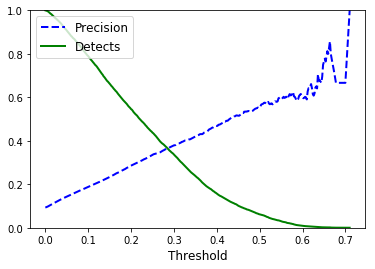

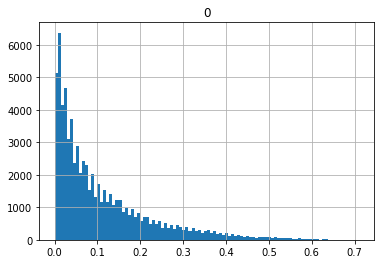

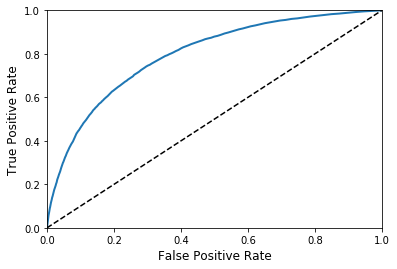

Duration: 0:07:40.069981


In [23]:
# Modell för sannolikhet för vinst.
start_time = datetime.now()

RFmodel = RandomForestClassifier(random_state=101, max_features='auto', n_estimators=500)
y_prob, y_test_prob, y_valid_prob = fit_and_evaluate(RFmodel, 'RFmodel:', X, y, X_test, y_test, X_valid, y_valid, 0.35)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [24]:
# df_train.info()
# np.isinf(df_train).sum()
# np.isinf(df_train).sum()
# print(np.isnan(X).sum())
# print(np.isnan(X).sum())

In [25]:
len(df_train)

119962

In [26]:
# Lägger på phat till alla df och beräknar CalcOdds och OddsRatio 

def addphat(ydata, probdata):
    
    y_df = pd.DataFrame(ydata)
    y_df.reset_index(inplace=True)
    y_df = pd.concat([y_df, pd.Series(probdata, name='phat')], axis=1)
    y_df.set_index('index', inplace=True)
    y_df.index.name = None
    
    df_phat = pd.merge(df_selected, y_df, left_index=True, right_index=True)
    df_phat['CalcOdds'] = 1/(df_phat['phat'])
    df_phat['Odds'] = df_phat['Odds']*0.1
    df_phat['OddsRatio'] = df_phat['Odds'] / df_phat['CalcOdds']
    
    return y_df, df_phat

y_train_df, df_train_phat = addphat(y, y_prob)
y_test_df, df_test_phat = addphat(y_test, y_test_prob)
y_valid_df, df_vaild_phat = addphat(y_valid, y_valid_prob)

In [27]:
df_train_phat.head()

,tvlid,datum,lopp,startsatt,division,spar,plac,Odds,Platsodds,horseid,id,bana,Spel,VinnareFlg,phat,CalcOdds,OddsRatio
973220,152070,2016-01-03,4,A,V,1,2,10.9,42.0,78312,1792488,BS,V5,0,0.010,100.000000,0.1090
973221,152070,2016-01-03,4,A,V,2,5,12.5,47.0,85745,1792489,BS,V5,0,0.030,33.333333,0.3750
973222,152070,2016-01-03,4,A,V,3,d,5.8,28.0,90436,1792490,BS,V5,0,0.056,17.857143,0.3248
973223,152070,2016-01-03,4,A,V,4,9,4.7,18.0,77836,1792491,BS,V5,0,0.040,25.000000,0.1880
973224,152070,2016-01-03,4,A,V,5,6,2.7,17.0,86015,1792492,BS,V5,0,0.068,14.705882,0.1836


# Resultat

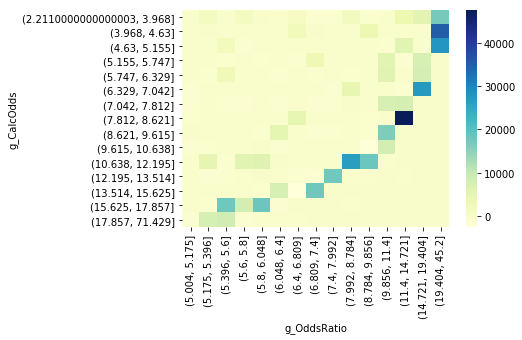

In [28]:
df = df_test_phat[['CalcOdds','Odds','OddsRatio','VinnareFlg','Spel','lopp','startsatt','division']]

def res(row):
    if row['VinnareFlg'] == 1:
        return (row['Odds'] * 100) - 100
    else:
        return -100
    
df['Result'] = df.apply(res, axis = 1)
df.reset_index()

# df = df[~np.isnan(df)]
# df = df[~np.isinf(df)]

df = df[df.OddsRatio > 5]  
# df = df[df.Odds < 100]

# bins1 = np.linspace(df.CalcOdds.min(), df.CalcOdds.max(), 30)
# bins2 = np.linspace(df.OddsRatio.min(), df.OddsRatio.max(), 30)
# df['g_CalcOdds'] = pd.cut(df['CalcOdds'].values, bins1)
# df['g_OddsRatio'] = pd.cut(df['OddsRatio'].values, bins2)

df['g_CalcOdds'] = pd.qcut(df['CalcOdds'], 15)
df['g_OddsRatio'] = pd.qcut(df['OddsRatio'], 15)
tab = df.groupby(['g_CalcOdds', 'g_OddsRatio']).Result.sum().unstack(fill_value=0)
ax = sns.heatmap(tab, cmap="YlGnBu")


In [29]:
# Plockar ut alla kombinationer av CalcOdds och OddsRatio som givit positivt resultat på validerings df.

def OddsFrame(df):
    
    out = pd.DataFrame()
    row = pd.DataFrame()
    total_row = 0
    
    for cols in list(tab.columns):
        row = pd.DataFrame(list(tab.loc[tab[cols] > 0].index.astype(str)))
        total_row = len(row)
        if total_row > 1:
            row.rename(columns = {list(row)[0]:'var'}, inplace=True)
            row['var'] = row['var'].map(lambda x: x.lstrip('(').rstrip(']'))
            row[['COlow','COhigh']] = row['var'].str.split(',',expand=True).astype(float)  
            row['ORlow'] = cols.left
            row['ORhigh'] = cols.right
            row.drop(columns=['var'], inplace=True)
            out = out.append(row,ignore_index=True, sort=False)
    return out
    
frame = OddsFrame(tab)
# frame

In [30]:
# Väljer ut vilka hästar som ska spelas (out-of-time) utifrån OddsFrame.

def SelectPosition(df):
    
    # För att resultatet inte ska påverkas för mycket av extrema odds sätts maxodds till 50.
    df['Odds'] = df.Odds.apply(lambda x: 70 if x > 70 else x)
    df3 = df[['CalcOdds','Odds','OddsRatio','VinnareFlg','datum','tvlid','Spel','lopp','startsatt','division','spar']]
    df3['Result'] = df3.apply(res, axis = 1)
    df3.reset_index()
    
    out = pd.DataFrame()
    for i in range(0,len(frame)):
        d = frame[['COlow','COhigh','ORlow','ORhigh']][i:i+1]
        sel = (((df3.OddsRatio >= d['ORlow'].item()) & (df3.OddsRatio <= d['ORhigh'].item()))
               & ((df3.CalcOdds >= d['COlow'].item()) & (df3.CalcOdds <= d['COhigh'].item())))
        out = out.append(df3[sel],ignore_index=True, sort=False)
    return out

        
df4 = SelectPosition(df_test_phat)

# Man borde kanske inte spela vinnare på fler hästar än en i varje lopp. Resultatet visar dock att den extra kostnaden uppvägs
# av vinsterna.
# df4 = df4.loc[df4.groupby(['tvlid'])['CalcOdds'].idxmax()]  

df4.Result.sum()

306270.0

In [31]:
# df4

In [32]:
# df4.sort_values(by = ['Result'], ascending=False)

Ackumulerat resultat, out-of-time (2018)


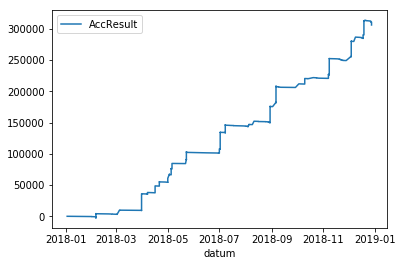

In [33]:
# Lägger på phat till test df

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df4 = df4.sort_values(by=['datum','tvlid']).drop_duplicates(inplace=False)
df4['AccResult'] = df4['Result'].cumsum(axis = 0)

print('Ackumulerat resultat, out-of-time (2018)')
ax = plt.gca()
df4.plot(kind='line',x='datum',y='AccResult',ax=ax)
plt.show();

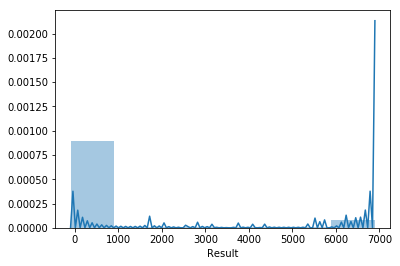

In [34]:
warnings.filterwarnings('ignore')
sns.distplot(df4['Result'], bins=7);
plt.show();

In [35]:
aggregation = {'Result': {'Sum(kr)': 'sum', 'Mean(kr)': 'mean', 'Antal(n)': 'count'}, 'VinnareFlg': {'VinstRatio': 'mean'} }

print(df4.groupby(['Spel']).agg(aggregation))
print()
print(df4.groupby(['division']).agg(aggregation))
print()
print(df4.groupby(['startsatt']).agg(aggregation))
print()
print(df4.groupby(['lopp']).agg(aggregation))
print()
print(df4.groupby(['spar']).agg(aggregation))
print()

        Result                      VinnareFlg
       Sum(kr)    Mean(kr) Antal(n) VinstRatio
Spel                                          
V5    256840.0  675.894737      380   0.123684
V75    14980.0  129.137931      116   0.043103
V86    34450.0  604.385965       57   0.122807

            Result                       VinnareFlg
           Sum(kr)     Mean(kr) Antal(n) VinstRatio
division                                           
1           6500.0  1300.000000        5   0.200000
2           8120.0  1353.333333        6   0.333333
G           -100.0  -100.000000        1   0.000000
K           -600.0  -100.000000        6   0.000000
L           -100.0  -100.000000        1   0.000000
Q           -400.0  -100.000000        4   0.000000
S           -200.0  -100.000000        2   0.000000
U           2760.0   250.909091       11   0.090909
V         290290.0   561.489362      517   0.106383

             Result                      VinnareFlg
            Sum(kr)    Mean(kr) Antal(n)